
Given references Tweets generated, the resources are grouped into categories that represent sentiment of the tweet in general which include (1) Positive, (0) Neutral, (-1) Negative.

The goal is to predict which class a particular resource belongs to given the tweet



Loading data using path variable using .read_csv() method of pandas


In [1]:


# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix


# Code starts here

# load data
tweets = pd.read_csv('Twitter_Data.csv')

tweets = tweets[['clean_text', 'category']]

# distribution of classes
dist = tweets.category.value_counts()

# display class distribution
print(dist)

# display data
print(tweets.head())


 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


Above we selected the required subset of data and observed the distribution of labels. Now time to preprocess text data by doing the following steps on the clean_text column -

Retaining only alphabets (Using regular expressions) Using Lambda Function
Removing stopwords (Using nltk library) Using Lambda Function
Splitting into train and test sets (Uisng scikit-learn library) Using Lambda Function
Initialize stopwords as stop with set(stopwords.words('english')) Using Lambda Function

Finally split into train and test using train_test_split function, test size is 20% and random state is 3. Save the resultant variables as X_train, X_test, Y_train and Y_test


In [2]:
tweets['clean_text']=tweets['clean_text'].apply(str)

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162980 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


As we can see there are ~7 Null entries , hence removing them

In [4]:
tweets = tweets.dropna()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162973 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162973 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [5]:

import nltk
nltk.download('stopwords')
# stopwords 
stop = set(stopwords.words('english'))

# retain only alphabets
tweets['clean_text'] = tweets['clean_text'].apply(lambda x:re.sub("[^a-zA-Z]", " ",x))

# convert to lowercase and tokenize
tweets['clean_text'] = tweets['clean_text'].apply(lambda x:x.lower().split())

# remove stopwords
tweets['clean_text'] = tweets['clean_text'].apply(lambda x:[i for i in x if i not in stop])

# join list elements
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join(x))

# split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(tweets["clean_text"], tweets["category"],
                                                                            test_size = 0.2,random_state=3)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FAIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
Y_train.isna().sum()

0

Vectorize with Bag-of-words and TF-IDF approach

After cleaning data we vectorize data so that it can be fed into an ML algorithm. using Bag-of-words and TF-IDF.


Initialize Bag-of-words vectorizer as CountVectorizer() 

 fit each vectorizer on training and test features with text data and transform them to vectors.

First fit and transform data with count_vectorizer on X_train using .fit_transform(X_train) method of count_vectorizer and save it as X_train_count and then on X_train

Similarly repeat for tfidf_vectorizer 



In [7]:

# initialize count vectorizer
count_vectorizer = CountVectorizer()

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# fit and transform with count vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


# fit and transform with tfidf vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


print(X_train_count.shape)
print(X_test_tfidf.shape)


# initialize count vectorizer
count_vectorizer = CountVectorizer()

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# fit and transform with count vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


# fit and transform with tfidf vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_count.shape)
print(X_test_tfidf.shape)


(130378, 87437)
(32595, 2301821)
(130378, 87437)
(32595, 2301821)


Multinomial Naive Bayes
Naive Bayes Classifier is a best algorithm to start with not just because of its fast computation but also for its quick explainability

Multinomial Naive Bayes is an algorithm that can be used for the purpose of multi-class classification. 
Using it to train and test it on both the versions i.e. Bag-of-words and TF-IDF ones and then checking the accuracy on both of them

First initialize two Multinomial Naive Bayes classifiers with MultinomialNB() and save them as nb_1 and nb_2. The reason for initializing two classifiers is because you will be training and testing on both Bag-of-words and TF-IDF transformed training data

nb_1 on X_train_count and Y_train using .fit() method

nb_2 on X_train_tfidf and Y_train using .fit() method



In [8]:


# initialize multinomial naive bayes
nb_1 = MultinomialNB()
nb_2 = MultinomialNB()

# fit on count vectorizer training data
nb_1.fit(X_train_count, Y_train)

# fit on tfidf vectorizer training data
nb_2.fit(X_train_tfidf, Y_train)

# accuracy with count vectorizer
acc_count_nb = accuracy_score(nb_1.predict(X_test_count), Y_test)

# accuracy with tfidf vectorizer
acc_tfidf_nb = accuracy_score(nb_2.predict(X_test_tfidf), Y_test)

# display accuracies
print(acc_count_nb, acc_tfidf_nb)

# Code ends here


0.7302040190213223 0.5379352661451143


<AxesSubplot:>

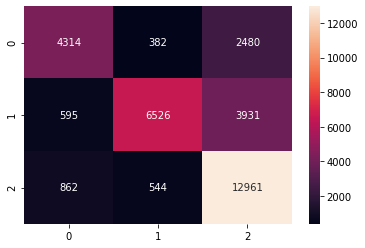

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , nb_1.predict(X_test_count))
sns.heatmap(cm, annot=True, fmt='g')

<AxesSubplot:>

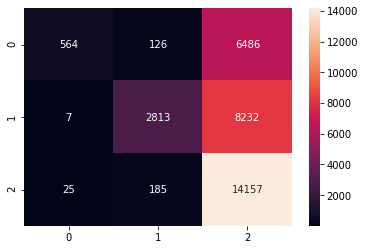

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , nb_2.predict(X_test_tfidf))
sns.heatmap(cm, annot=True, fmt='g')

In [11]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(Y_test , nb_1.predict(X_test_count))
print(cr)

              precision    recall  f1-score   support

        -1.0       0.75      0.60      0.67      7176
         0.0       0.88      0.59      0.71     11052
         1.0       0.67      0.90      0.77     14367

    accuracy                           0.73     32595
   macro avg       0.76      0.70      0.71     32595
weighted avg       0.76      0.73      0.72     32595



In [12]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(Y_test , nb_2.predict(X_test_tfidf))
print(cr)

              precision    recall  f1-score   support

        -1.0       0.95      0.08      0.15      7176
         0.0       0.90      0.25      0.40     11052
         1.0       0.49      0.99      0.65     14367

    accuracy                           0.54     32595
   macro avg       0.78      0.44      0.40     32595
weighted avg       0.73      0.54      0.46     32595



Logistic Regression can be used for binary classification but when combined with OneVsRest classifer, it can perform multiclass classification as well. 

Instructions First initialize two classifiers with OneVsRestClassifier(LogisticRegression(random_state=10)) and save them as logreg_1 and logreg_2. 
The accuracy with Bag-of-words approach using accuracy_score(logreg_1.predict(X_test_count), Y_test) and save it as acc_count_logreg
 Similarly The accuracy for the TF-IDF approach (only difference is the classifer is logreg_2) and save it as acc_tfidf_logreg Print out acc_count_logreg and acc_tfidf_logreg to check 
 which version performs better for with Multinomial Naive Bayes as classifer

In [13]:
import warnings
warnings.filterwarnings('ignore')

# initialize logistic regression
logreg_1 = OneVsRestClassifier(LogisticRegression(random_state=10))
logreg_2 = OneVsRestClassifier(LogisticRegression(random_state=10))

# fit on count vectorizer training data
logreg_1.fit(X_train_count, Y_train)

# fit on tfidf vectorizer training data
logreg_2.fit(X_train_tfidf, Y_train)

# accuracy with count vectorizer
acc_count_logreg = accuracy_score(logreg_1.predict(X_test_count), Y_test)

# accuracy with tfidf vectorizer
acc_tfidf_logreg = accuracy_score(logreg_2.predict(X_test_tfidf), Y_test)

# display accuracies
print(acc_count_logreg, acc_tfidf_logreg)



0.9085135757017948 0.8365086669734622


<AxesSubplot:>

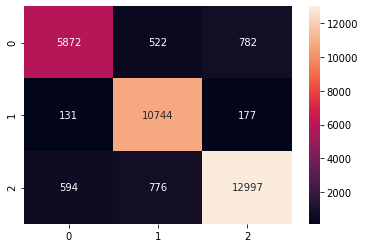

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , logreg_1.predict(X_test_count))
sns.heatmap(cm, annot=True, fmt='g')

<AxesSubplot:>

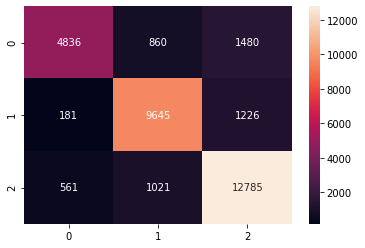

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , logreg_2.predict(X_test_tfidf))
sns.heatmap(cm, annot=True, fmt='g')

In [16]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(Y_test , logreg_1.predict(X_test_count))
print(cr)

              precision    recall  f1-score   support

        -1.0       0.89      0.82      0.85      7176
         0.0       0.89      0.97      0.93     11052
         1.0       0.93      0.90      0.92     14367

    accuracy                           0.91     32595
   macro avg       0.90      0.90      0.90     32595
weighted avg       0.91      0.91      0.91     32595



In [17]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(Y_test , logreg_2.predict(X_test_tfidf))
print(cr)

              precision    recall  f1-score   support

        -1.0       0.87      0.67      0.76      7176
         0.0       0.84      0.87      0.85     11052
         1.0       0.83      0.89      0.86     14367

    accuracy                           0.84     32595
   macro avg       0.84      0.81      0.82     32595
weighted avg       0.84      0.84      0.83     32595



Decision Tree Classifier
Decision Trees are a type of Supervised Machine Learning Algorithm where the data is continuously split according to a certain parameter at each node making decisions as it goes deeper.
Here, Decisions tree will be making a lot of node as there is a huge corpus of words ~10^6 words found,

In [18]:
from sklearn.tree import DecisionTreeClassifier
import time
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer

s = time.time()
clf_tree = clf_tree.fit(X_train_count,Y_train)
e = time.time()
dt_time = e - s
print("dt time taken = {}".format(dt_time))

#Predict the response for test dataset
y_pred_tree = clf_tree.predict(X_test_count)

dt time taken = 375.18262124061584


In [19]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
# accuracy with count vectorizer
acc_count_logreg = accuracy_score(y_pred_tree, Y_test)
print(acc_count_logreg)


0.8633225954901058


<AxesSubplot:>

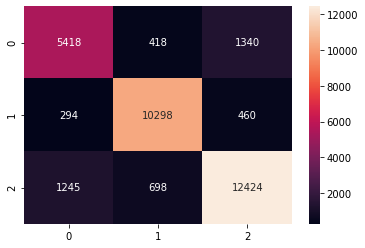

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , y_pred_tree)
sns.heatmap(cm, annot=True, fmt='g')

In [21]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(Y_test , y_pred_tree)
print(cr)

              precision    recall  f1-score   support

        -1.0       0.78      0.76      0.77      7176
         0.0       0.90      0.93      0.92     11052
         1.0       0.87      0.86      0.87     14367

    accuracy                           0.86     32595
   macro avg       0.85      0.85      0.85     32595
weighted avg       0.86      0.86      0.86     32595



# Summary
## Model performance
1. Naive Bayes Model =
    a. CountVectorizer- 0.7302040190213223 
    b. TFDIF -0.5379352661451143
2. OneVsRest Logistic Regression
    a. CountVectorizer- 0.9085135757017948 
    b. TFIDF - 0.8365086669734622
3. Decision Trees 
    a.CountVectorizer - 0.8638134683233625
    b. TFIDF - NA

The same as above decision tree classifier is taking too long to run with tfidf vectorized data set hence leaving it for the time being

In [13]:
from sklearn.tree import DecisionTreeClassifier
import time
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer

s = time.time()
clf_tree = clf_tree.fit(X_train_tfidf,Y_train)
e = time.time()
dt_time = e - s
print("dt time taken = {}".format(dt_time))

#Predict the response for test dataset
y_pred_tree = clf_tree.predict(X_test_count)

In [ ]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
# accuracy with count vectorizer
acc_count_logreg = accuracy_score(logreg_1.predict(X_test_count), y_pred_tree)
print(acc_count_logreg)
